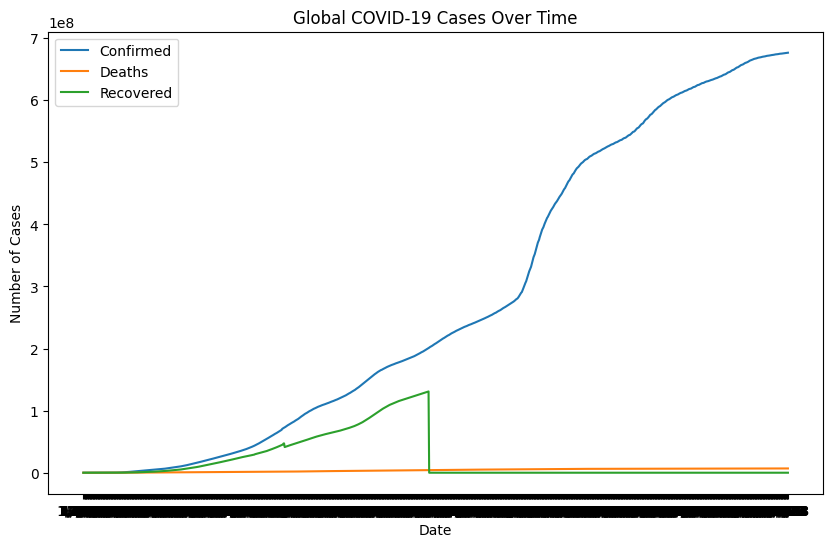

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed = pd.read_csv(url)
# Fetch COVID-19 data for deaths
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_deaths = pd.read_csv(url_deaths)
# Fetch COVID-19 data for recovered cases
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_recovered = pd.read_csv(url_recovered)
# Example: Drop unnecessary columns
df_confirmed = df_confirmed.drop(["Lat", "Long", "Province/State"], axis=1)
df_deaths = df_deaths.drop(["Lat", "Long", "Province/State"], axis=1)
df_recovered = df_recovered.drop(["Lat", "Long", "Province/State"], axis=1)
# Matplotlib example
plt.figure(figsize=(10, 6))
plt.plot(df_confirmed.sum()[2:], label="Confirmed")
plt.plot(df_deaths.sum()[2:], label="Deaths")
plt.plot(df_recovered.sum()[2:], label="Recovered")
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()
countries = ["US", "India", "Brazil", "Russia"]
fig = px.line()
for country in countries:
    fig.add_scatter(x=df_confirmed.columns[4:], y=df_confirmed[df_confirmed["Country/Region"] == country].iloc[0, 4:], mode='lines', name=f'Confirmed - {country}')
    fig.add_scatter(x=df_deaths.columns[4:], y=df_deaths[df_deaths["Country/Region"] == country].iloc[0, 4:], mode='lines', name=f'Deaths - {country}')
    fig.add_scatter(x=df_recovered.columns[4:], y=df_recovered[df_recovered["Country/Region"] == country].iloc[0, 4:], mode='lines', name=f'Recovered - {country}')

fig.update_layout(title='COVID-19 Cases Comparison',
                  xaxis_title='Date',
                  yaxis_title='Number of Cases')

fig.show()

[*********************100%%**********************]  2 of 2 completed


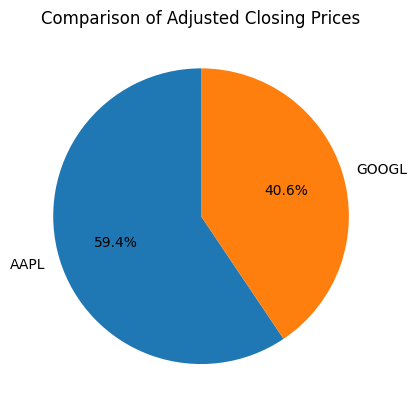

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define stock symbols and date range
symbols = ['AAPL', 'GOOGL']
start_date = '2022-01-01'
end_date = '2022-12-31'
# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)
# Extract the last adjusted closing prices
last_adj_close = stock_data['Adj Close'].iloc[-1]
# Plot pie chart to compare adjusted closing prices
plt.pie(last_adj_close, labels=symbols, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Adjusted Closing Prices')
plt.show()

In [ ]:
import geopandas as gpd
import folium


In [ ]:
# Download world countries GeoJSON file
!wget https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson -O countries.geojson

# Load GeoJSON file using geopandas
world_geojson = gpd.read_file('countries.geojson')

--2023-12-29 17:38:42--  https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24261278 (23M) [text/plain]
Saving to: ‘countries.geojson’

countries.geojson   100%[===================>]  23.14M   135MB/s    in 0.2s    

2023-12-29 17:38:42 (135 MB/s) - ‘countries.geojson’ saved [24261278/24261278]



In [ ]:
# Create a folium map centered around the coordinates (0, 0)
map_markers = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for specific locations (e.g., latitude, longitude of cities)
folium.Marker([51.5074, -0.1278], popup='London').add_to(map_markers)
folium.Marker([40.7128, -74.0060], popup='New York').add_to(map_markers)

# Display the map
map_markers

In [ ]:
map_choropleth = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=None,  # Add your data here if you have a GeoDataFrame
    columns=['iso_a3', 'value_column'],  # Specify columns from your GeoDataFrame
    key_on='feature.properties.iso_a3',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Data Variation'
).add_to(map_choropleth)

# Display the map
map_choropleth

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Create animated map based on temporal GeoJSON data
map_animated = folium.Map(location=[0, 0], zoom_start=2)
folium.Marker([51.5074, -0.1278], popup='London').add_to(map_animated)
folium.Marker([40.7128, -74.0060], popup='New York').add_to(map_animated)

# Display the animated map
map_animated.save('animated_map.html')  # Save the map as an HTML file